In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
#Select relevant columns

In [3]:
data = df[['daily','sunday']]
data

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [4]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [4]:
#Correlation analysis

In [5]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

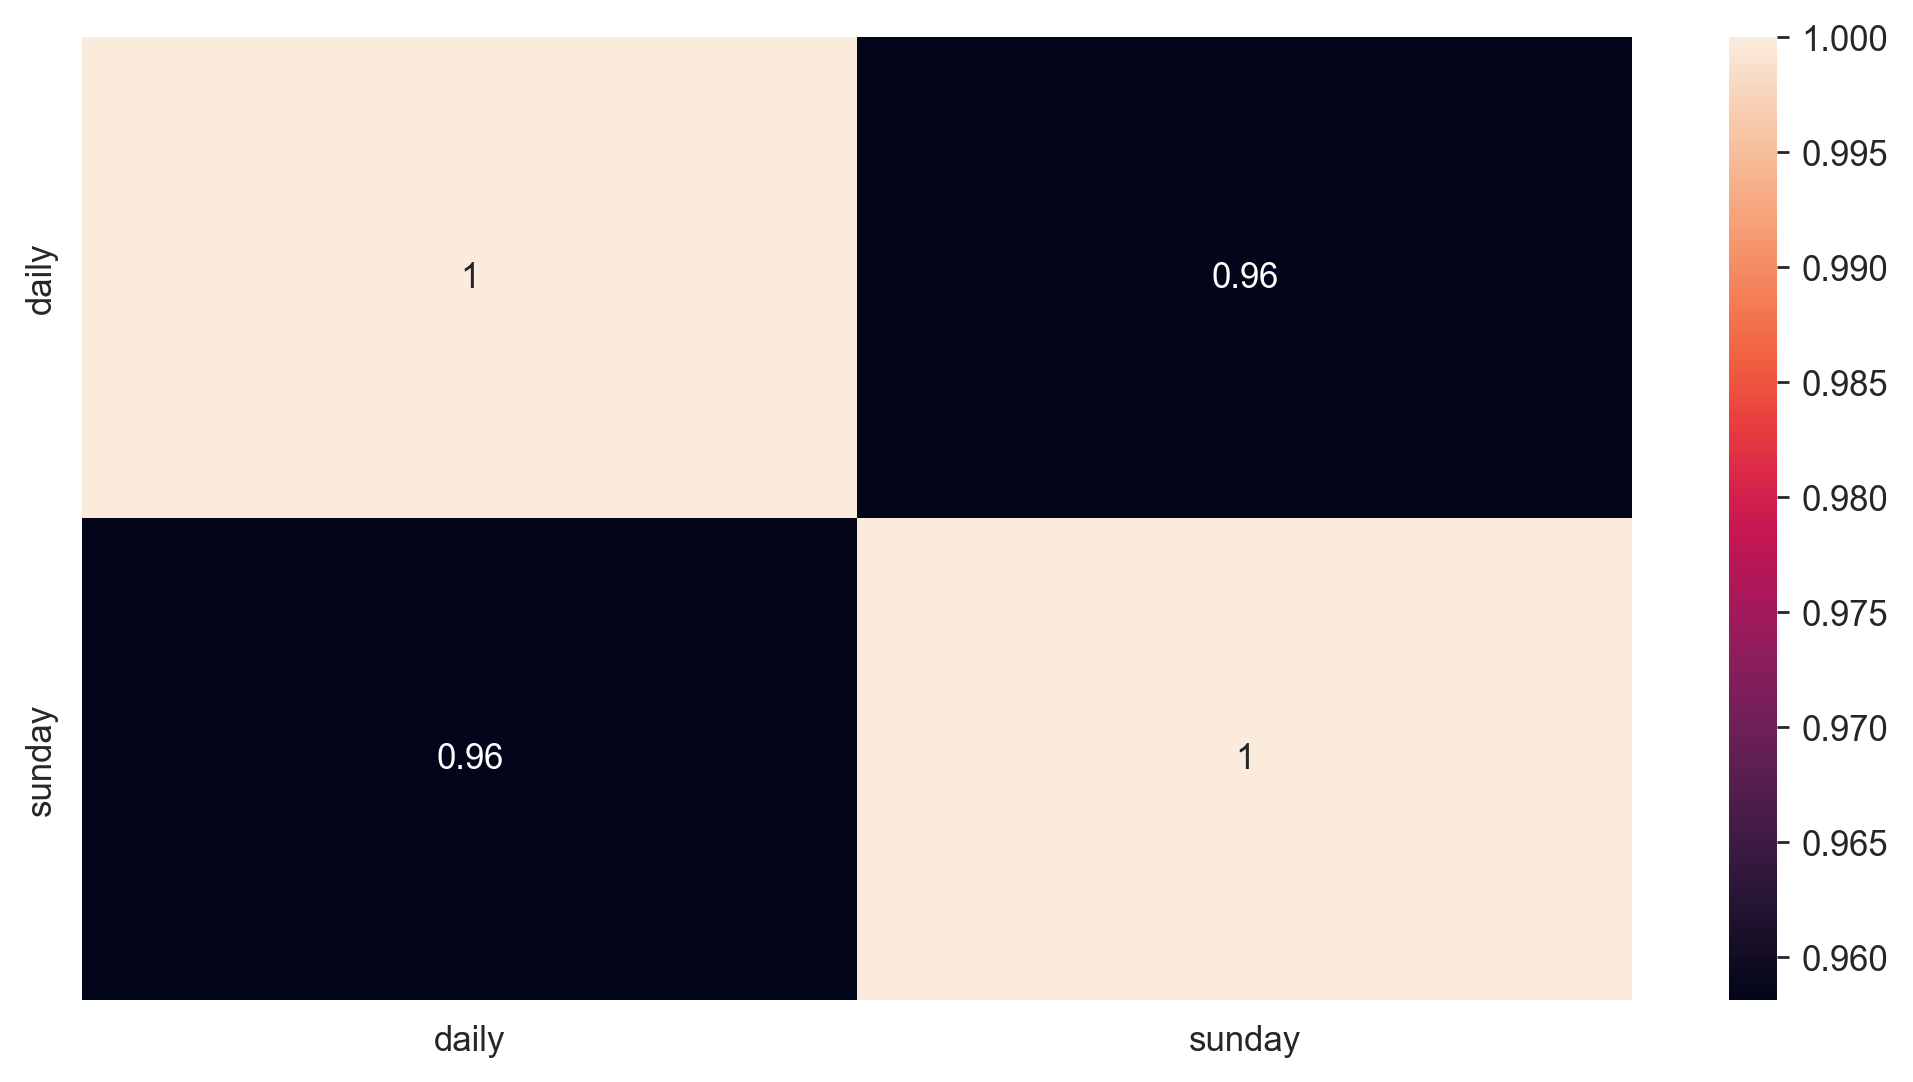

In [6]:
sns.heatmap(data.corr(),annot=True)

In [5]:
#Import statsmodels

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols('sunday~daily',data=data).fit()

In [6]:
#Model parameters

In [9]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [10]:
#line equation
daily = 650

y = 1.339715*daily + 13.835630
y

884.65038

In [11]:
#Print values for t value and p value
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [12]:
#r2 value
model.rsquared

0.9180596895873294

# Prediction for new data

In [13]:
newdf = pd.DataFrame({
    'daily' : [120,520,850,350,452]
})
newdf

,daily
0,120
1,520
2,850
3,350
4,452


In [14]:
model.predict(newdf)

0     174.601401
1     710.487304
2    1152.593174
3     482.735795
4     619.386700
dtype: float64

# Data Transformation
1. Sqrt 
2. Log

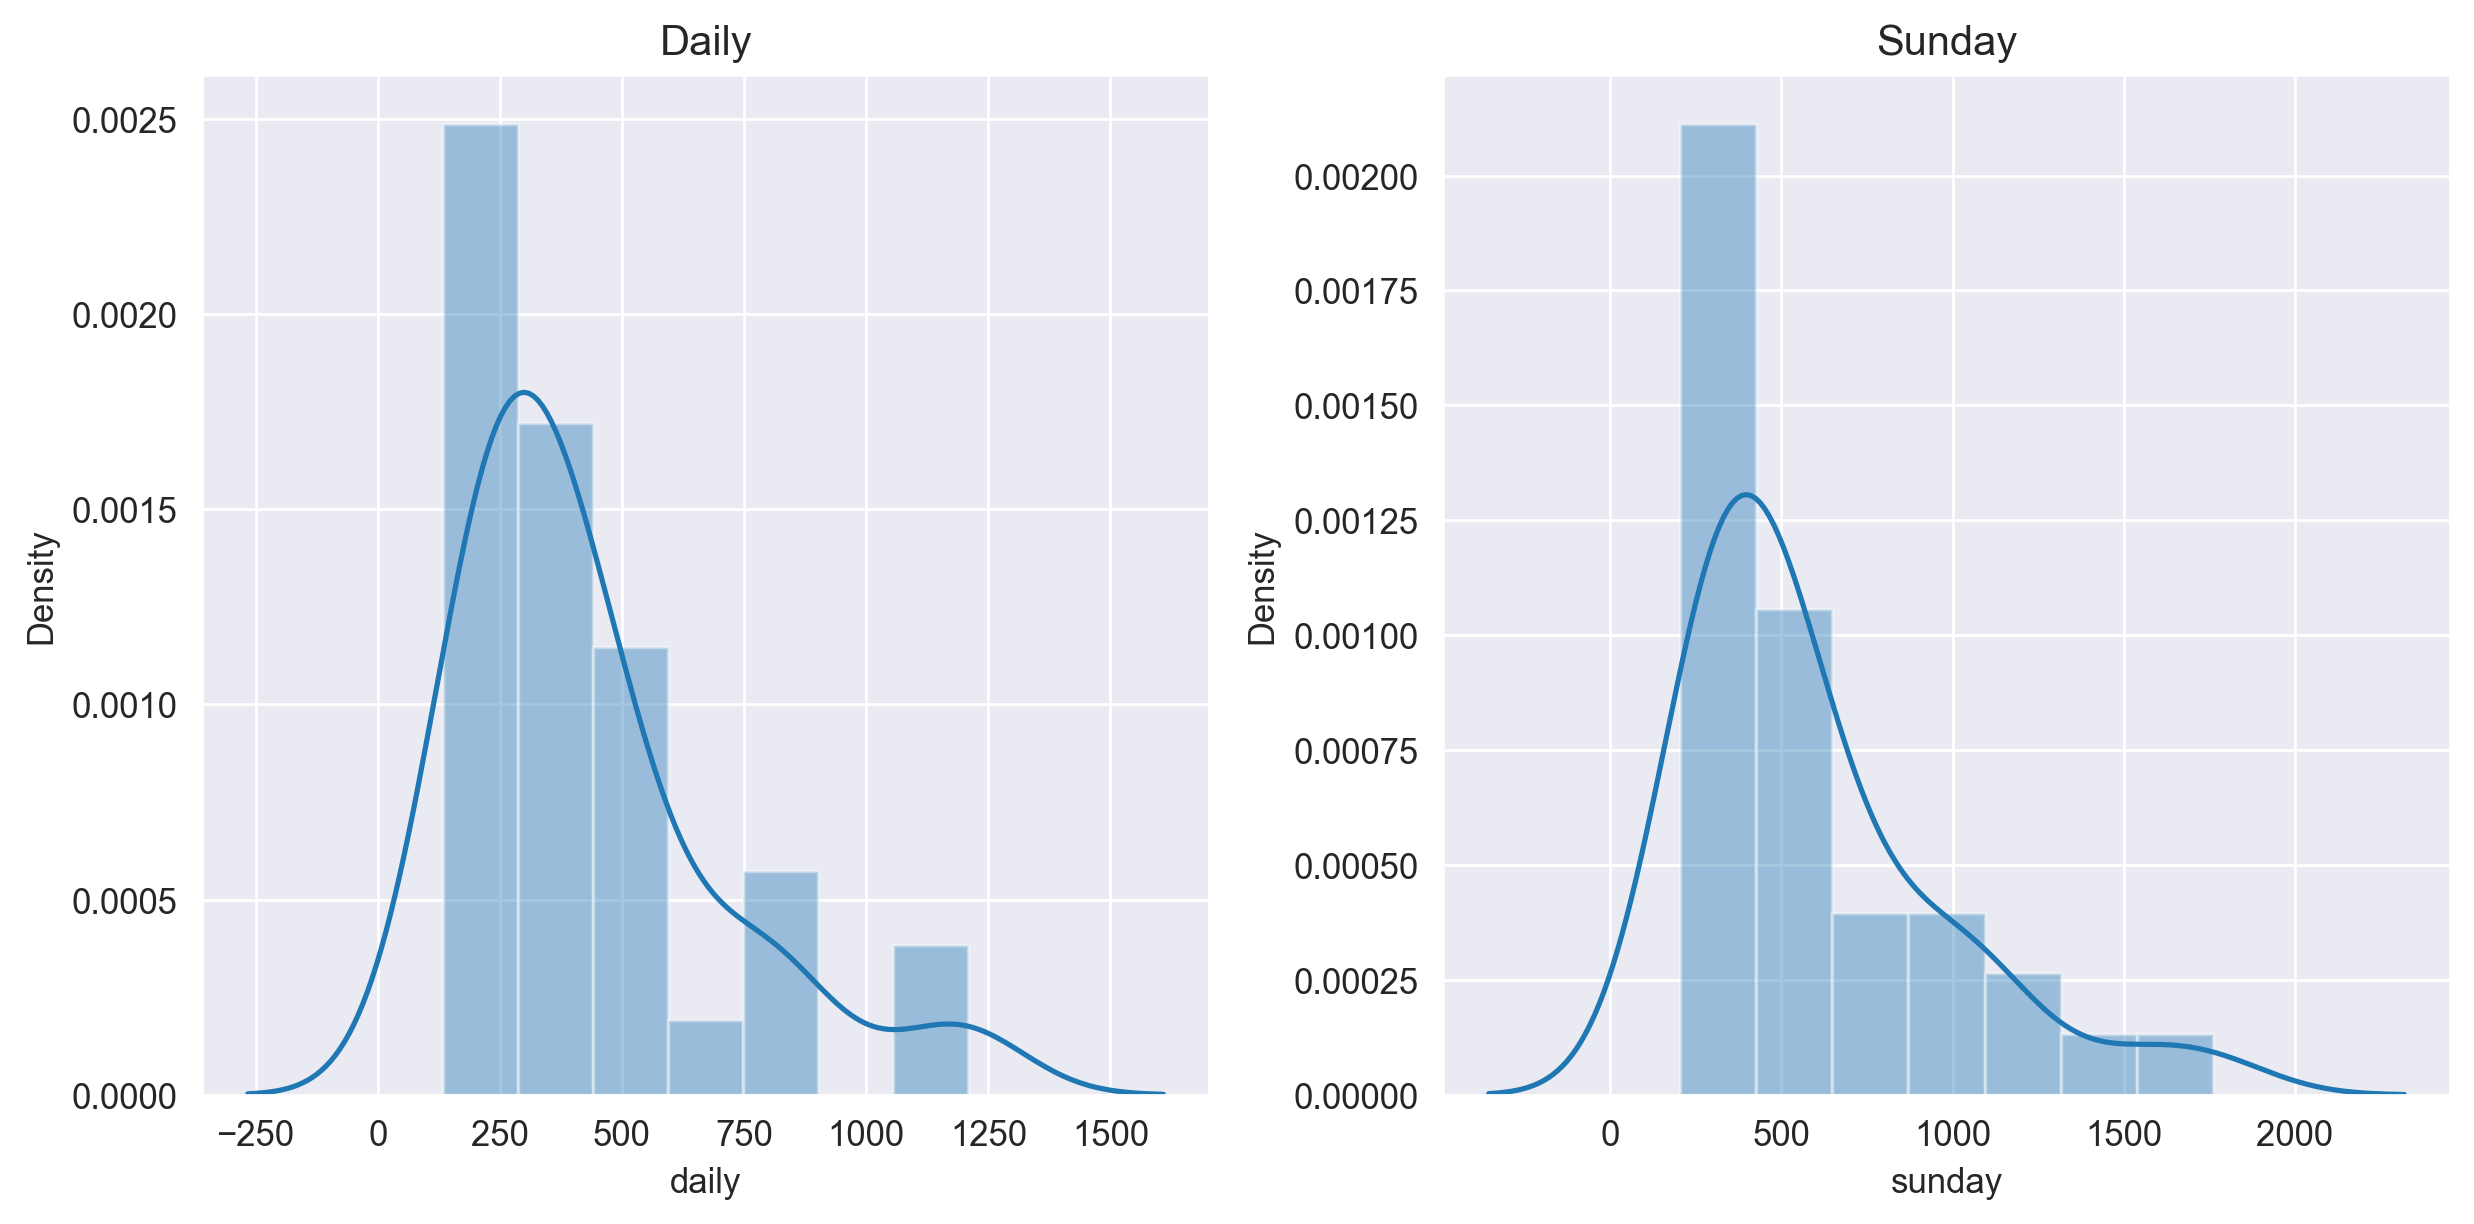

In [26]:
plt.subplot(1,2,1)
sns.distplot(data['daily'])
plt.title('Daily')

plt.subplot(1,2,2)
sns.distplot(data['sunday'])
plt.title('Sunday')

plt.tight_layout()

In [17]:
data['sunday'].skew()

1.5644730738925112

In [18]:
data['daily'].skew()

1.5321591323040094

# Log Transformation

In [19]:
data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [20]:
data['log_daily'] = np.log(data['daily'])
data['log_sunday'] = np.log(data['sunday'])
data

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


In [22]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='log_sunday', ylabel='Density'>

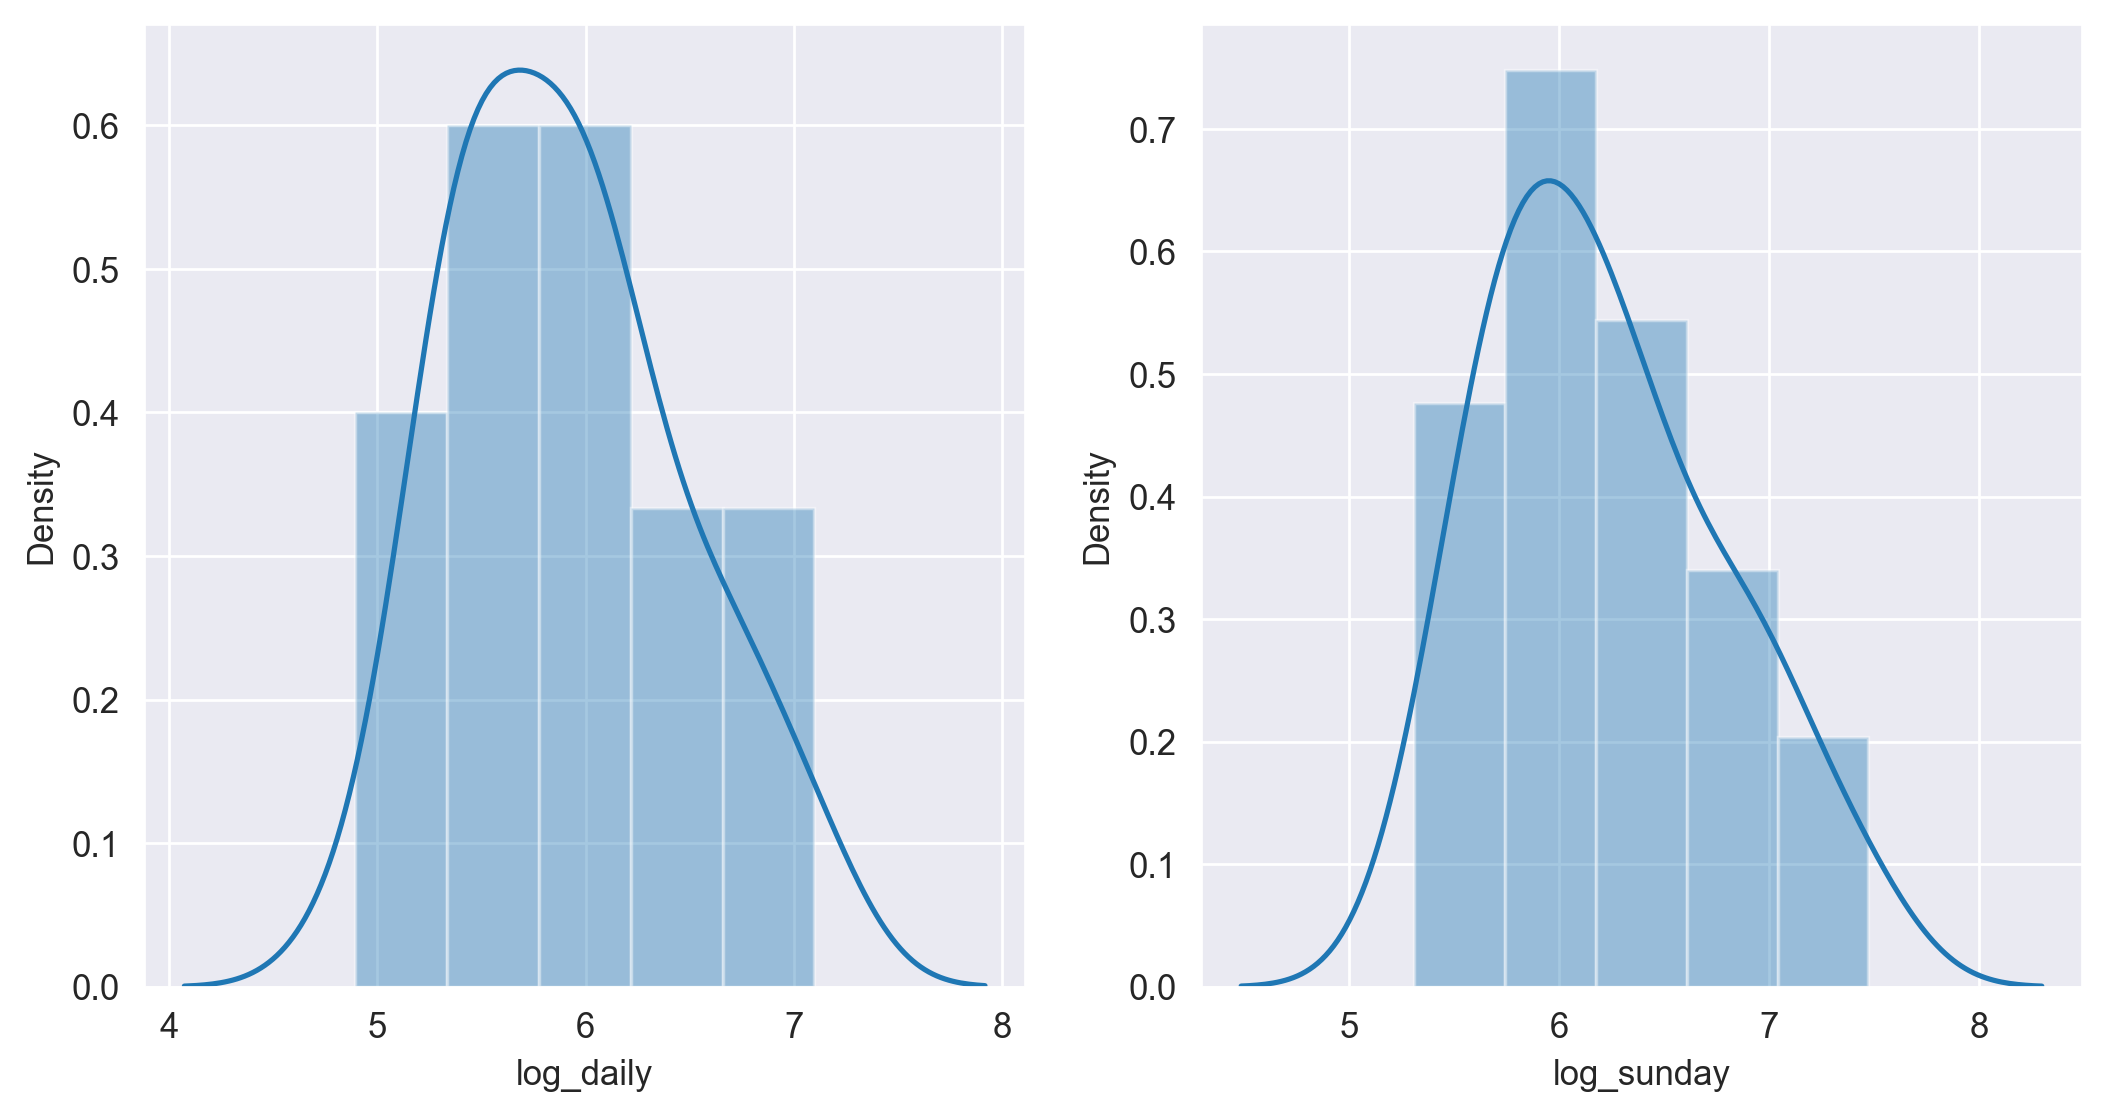

In [23]:
plt.subplot(1,2,1)
sns.distplot(data['log_daily'])

plt.subplot(1,2,2)
sns.distplot(data['log_sunday'])

In [24]:
data['log_daily'].skew()

0.4682202000020356

In [25]:
data['log_sunday'].skew()

0.5337572087816101

In [10]:
#Sqrt transformation

# WC dataset

In [11]:
#import data
#Create/ fit the data in model
#Get the prediction